In [1]:
#imports
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import calendar

In [2]:
df_pay_totals = pd.read_excel('PayTotals.xlsx')

## Data Preprocessing & Analysis

In [3]:
df_pay_totals.head()

,PayDate,PayTerms,PayTotal,PayCount
0,2015-09-24,Check,42.27,1
1,2015-09-24,Credit Card,243.84,1
2,2015-09-25,Credit Card,8.67,1
3,2015-09-26,Check,486.60,1
4,2015-09-26,Credit Card,1919.32,3


In [4]:
# Add Day, Month, and Quarter to Dataframe
df_pay_totals['Day'] = df_pay_totals['PayDate'].dt.day_name()
df_pay_totals['Month'] = pd.DatetimeIndex(df_pay_totals['PayDate']).month
#abbreviate call month
df_pay_totals['Month'] = df_pay_totals['Month'].apply(lambda x: calendar.month_abbr[x])
df_pay_totals['Quarter'] = df_pay_totals['PayDate'].dt.quarter.astype(str)
df_pay_totals.head()

,PayDate,PayTerms,PayTotal,PayCount,Day,Month,Quarter
0,2015-09-24,Check,42.27,1,Thursday,Sep,3
1,2015-09-24,Credit Card,243.84,1,Thursday,Sep,3
2,2015-09-25,Credit Card,8.67,1,Friday,Sep,3
3,2015-09-26,Check,486.60,1,Saturday,Sep,3
4,2015-09-26,Credit Card,1919.32,3,Saturday,Sep,3


In [5]:
df_pay_totals.tail()

,PayDate,PayTerms,PayTotal,PayCount,Day,Month,Quarter
3765,2020-08-11,Credit Card,1635.43000,4,Tuesday,Aug,3
3766,2020-08-11,Check,1750.00000,1,Tuesday,Aug,3
3767,2020-08-12,Credit Card,6711.74000,9,Wednesday,Aug,3
3768,2020-08-12,Cash,75.64999,3,Wednesday,Aug,3
3769,2020-08-12,Check,885.64000,2,Wednesday,Aug,3


In [6]:
df_pay_totals.dtypes

PayDate     datetime64[ns]
PayTerms            object
PayTotal           float64
PayCount             int64
Day                 object
Month               object
Quarter             object
dtype: object

In [7]:
df_pay_totals.count()

PayDate     3770
PayTerms    3753
PayTotal    3770
PayCount    3770
Day         3770
Month       3770
Quarter     3770
dtype: int64

In [8]:
df_pay_totals.PayTerms.value_counts()

Credit Card        1690
Cash               1309
Check               635
Acct bal adjsmt      97
Refund to Acct       22
Name: PayTerms, dtype: int64

In [9]:
df_pay_totals.shape

(3770, 7)

In [10]:
nulls = df_pay_totals[df_pay_totals.PayTerms.isna() == True]
nulls

,PayDate,PayTerms,PayTotal,PayCount,Day,Month,Quarter
339,2016-03-12,NaN,5.32,1,Saturday,Mar,1
460,2016-05-12,NaN,397.77,1,Thursday,May,2
494,2016-05-25,NaN,416.05,1,Wednesday,May,2
1492,2017-08-31,NaN,313.17,1,Thursday,Aug,3
1679,2017-11-20,NaN,13.38,1,Monday,Nov,4
1867,2018-02-17,NaN,23.03,1,Saturday,Feb,1
1895,2018-03-05,NaN,75.11,1,Monday,Mar,1
1915,2018-03-15,NaN,166.31,1,Thursday,Mar,1
2107,2018-06-16,NaN,57.64,1,Saturday,Jun,2
2176,2018-07-21,NaN,839.14,1,Saturday,Jul,3


In [11]:
df_pay_totals.PayTotal.sum().round(2)

5059134.03

In [12]:
nulls.PayTotal.sum().round(2) 

4696.9

In [13]:
pay_types = df_pay_totals.groupby(['PayTerms']).sum().round(2)

In [14]:
pd.set_option('float_format', '{:.2f}'.format)

In [15]:
# Show aggregated sales for each method of payment for all daily sales totals
# Hide as sensitive data
    
    #pay_types

In [16]:
# Aggregate pay totals for each day across all means of payment
daily_pays = df_pay_totals.groupby(['PayDate']).sum()

In [17]:
daily_pays.head(10)

,PayTotal,PayCount
PayDate,,
2015-09-24,286.11,2
2015-09-25,8.67,1
2015-09-26,2566.32,7
2015-09-28,475.77,2
2015-09-29,152.82,7
2015-09-30,386.90,1
2015-10-01,2112.23,1
2015-10-02,459.52,8
2015-10-03,9806.67,28


In [18]:
# Show aggregated total pays for each day of the week
# Hide as sensitive data
    #days_pay_total = df_pay_totals.groupby(['Day']).sum()
    #days_pay_total.sort_values(by=['PayTotal'], ascending=False)

In [19]:
# Show aggregated total pays for each month of the year
# Hide as sensitive data
    #month_pay_total = df_pay_totals.groupby(['Month']).sum()
    #month_pay_total.sort_values(by=['PayTotal'], ascending=False)

In [20]:
# Show aggregated total pays for each quarter of the year from 2015-2020
# Hide as sensitive data
    #quarter_pay_total = df_pay_totals.groupby(['Quarter']).sum()
    #quarter_pay_total.sort_values(by=['PayTotal'], ascending=False)

In [21]:
# Set year filter variables for each year 2015-2020
year1 = '2015-12-31'
year2 = '2016-12-31'
year3 = '2017-12-31'
year4 = '2018-12-31'
year5 = '2019-12-31'
year6 = '2020-12-31'

In [22]:
# Filter dataframe to create new dataframe for each year from 2015 - 2020 grouping by each day
year1_sales = df_pay_totals[df_pay_totals['PayDate'] <= year1]
year1_sales = year1_sales.groupby(['PayDate','Day','Month','Quarter'], as_index=False).sum()
year1_sales= year1_sales.set_index(['PayDate'])

year2_sales = df_pay_totals[(df_pay_totals['PayDate'] <= year2) & (df_pay_totals['PayDate'] > year1)]
year2_sales = year2_sales.groupby(['PayDate','Day','Month','Quarter'], as_index=False).sum()
year2_sales= year2_sales.set_index(['PayDate'])

year3_sales = df_pay_totals[(df_pay_totals['PayDate'] <= year3) & (df_pay_totals['PayDate'] > year2)]
year3_sales = year3_sales.groupby(['PayDate','Day','Month','Quarter'], as_index=False).sum()
year3_sales= year3_sales.set_index(['PayDate'])

year4_sales = df_pay_totals[(df_pay_totals['PayDate'] <= year4) & (df_pay_totals['PayDate'] > year3)]
year4_sales = year4_sales.groupby(['PayDate','Day','Month','Quarter'], as_index=False).sum()
year4_sales= year4_sales.set_index(['PayDate'])

year5_sales = df_pay_totals[(df_pay_totals['PayDate'] <= year5) & (df_pay_totals['PayDate'] > year4)]
year5_sales = year5_sales.groupby(['PayDate','Day','Month','Quarter'], as_index=False).sum()
year5_sales= year5_sales.set_index(['PayDate'])

year6_sales = df_pay_totals[(df_pay_totals['PayDate'] <= year6) & (df_pay_totals['PayDate'] > year5)]
year6_sales = year6_sales.groupby(['PayDate','Day','Month','Quarter'], as_index=False).sum()
year6_sales= year6_sales.set_index(['PayDate'])

In [23]:
year6_sales.head()

,Day,Month,Quarter,PayTotal,PayCount
PayDate,,,,,
2020-01-02,Thursday,Jan,1,3715.76,6
2020-01-03,Friday,Jan,1,6185.03,11
2020-01-04,Saturday,Jan,1,6972.21,17
2020-01-05,Sunday,Jan,1,928.83,11
2020-01-06,Monday,Jan,1,5287.57,6


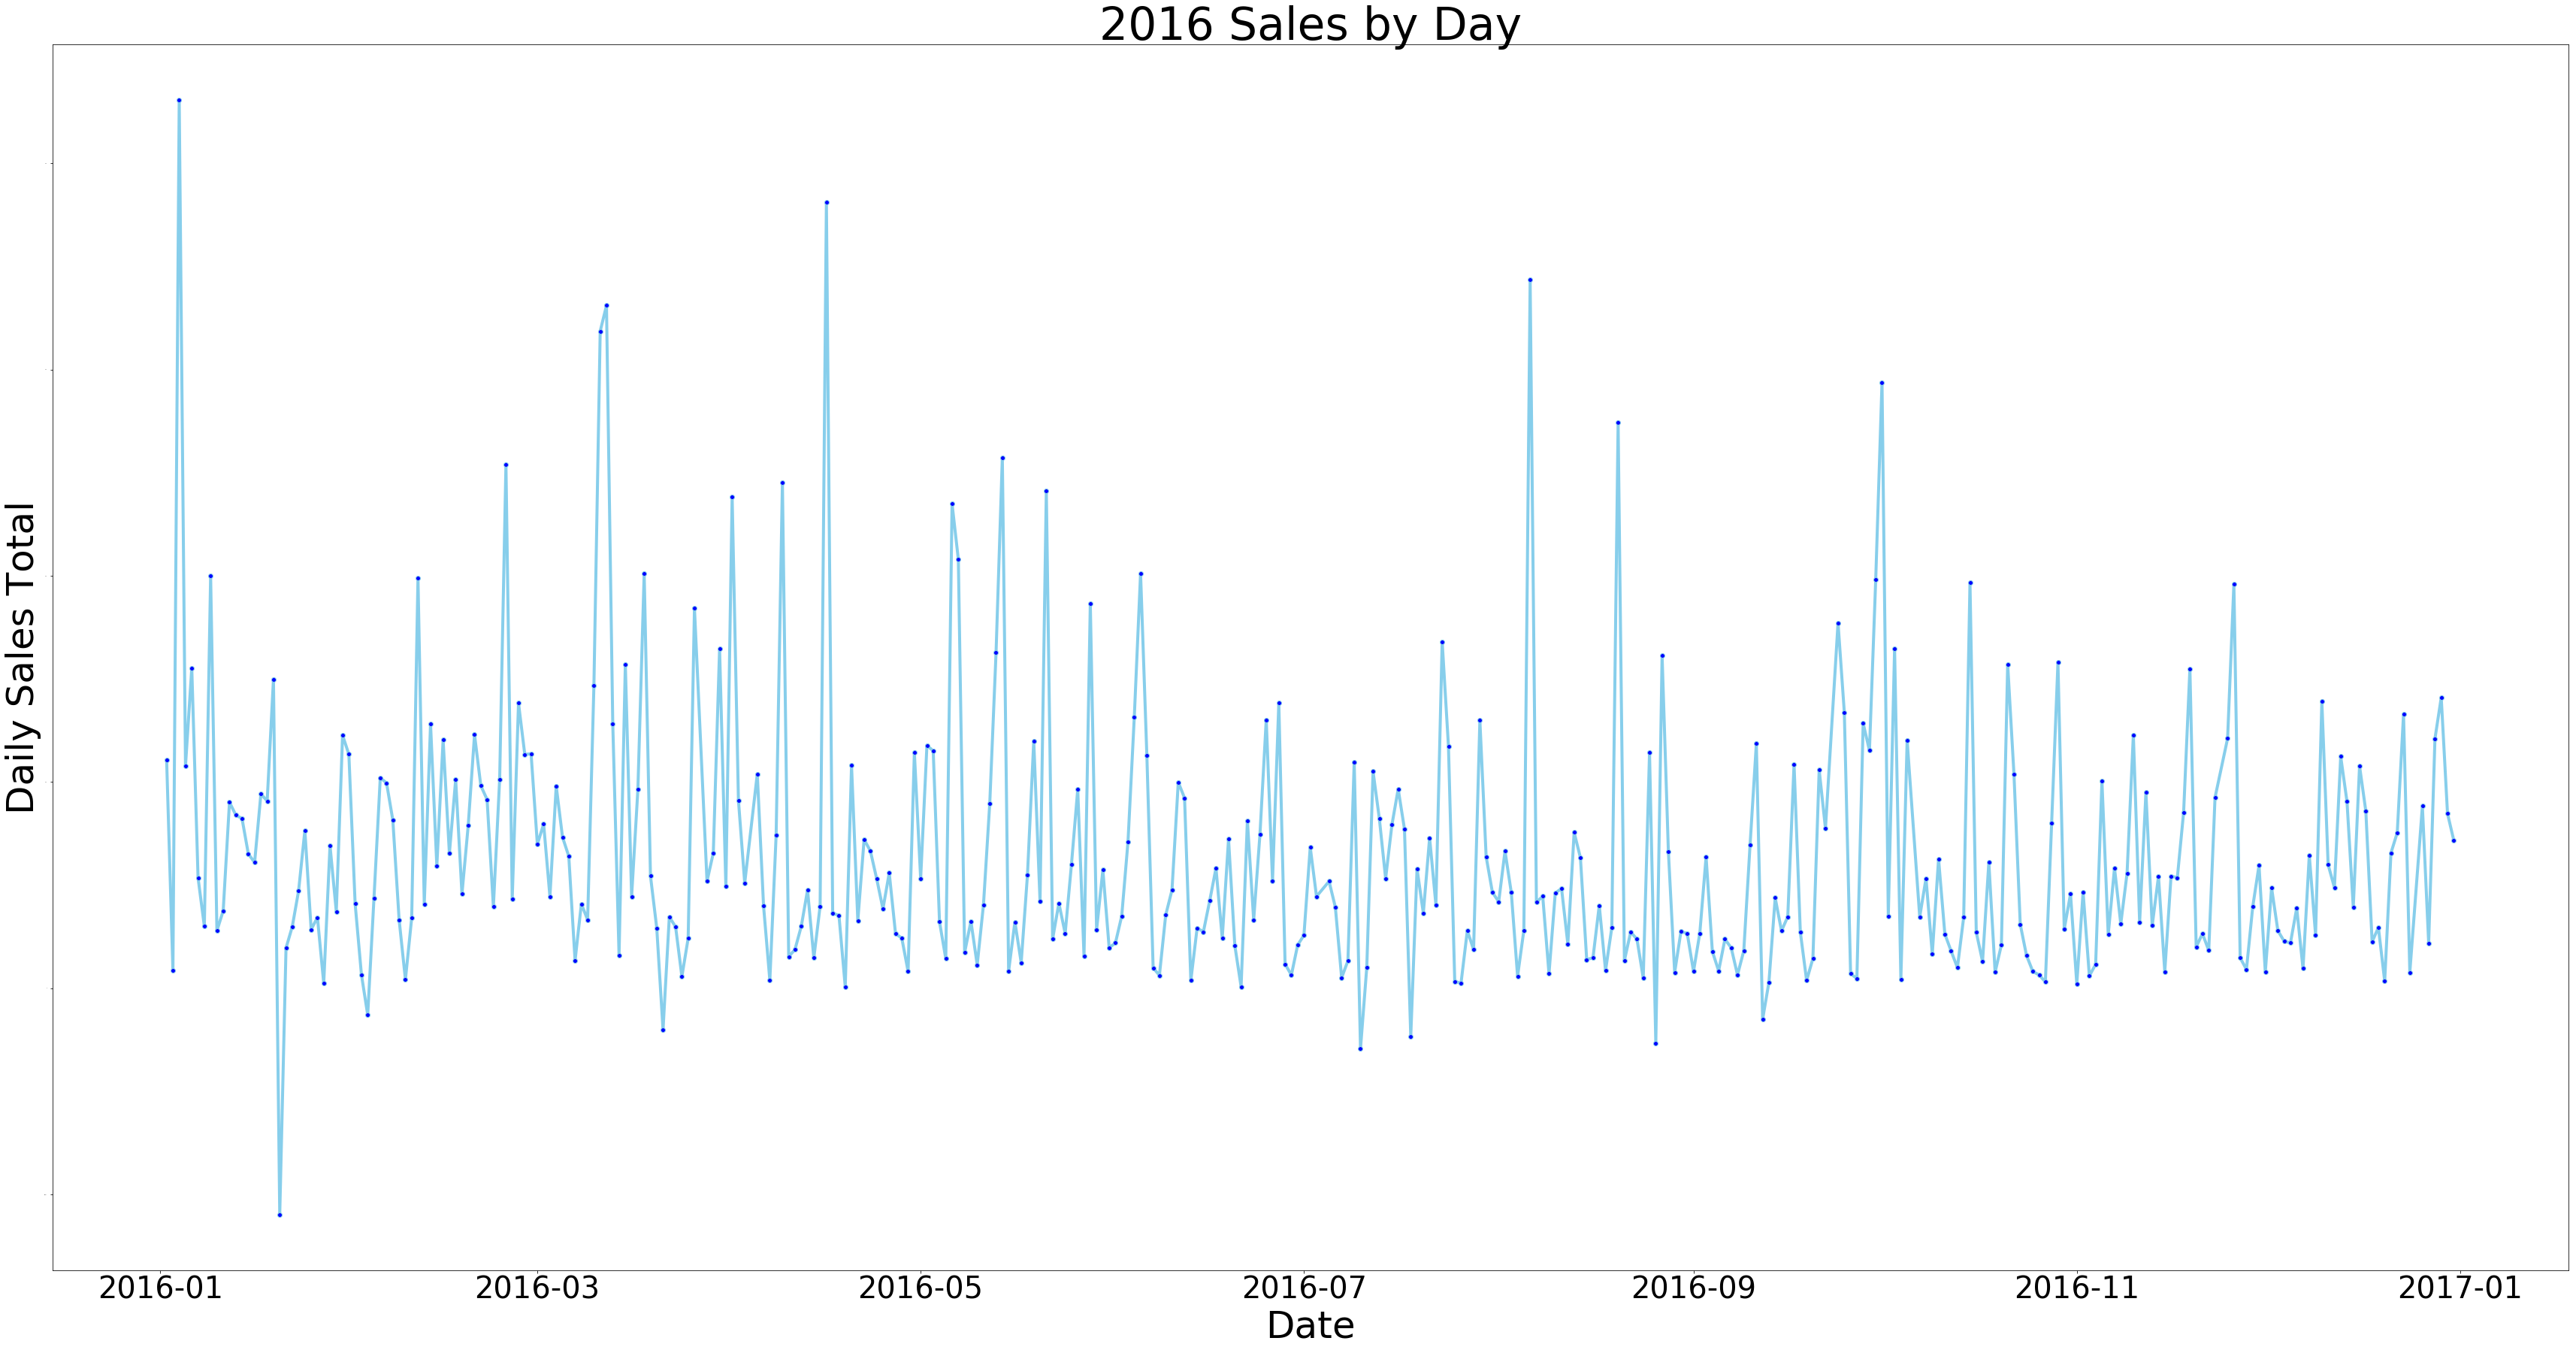

In [24]:
# Plot 2016 sales over the year
plt.figure(figsize=(60,30))
plt.plot(year2_sales.index, 'PayTotal', data=year2_sales, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
#plt.plot(grp2.index, 'PayTotal', data=grp2, marker='o', markerfacecolor='red', markersize=3, color='red', linewidth=4)
plt.title('2016 Sales by Day', fontsize=60)
plt.xlabel('Date', fontsize=50)
plt.ylabel('Daily Sales Total', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=0)
plt.show()

In [25]:
# Group by Month excluding 2015 as incomplete year
year2_sales_months = year2_sales.groupby(['Month']).sum()
year3_sales_months = year3_sales.groupby(['Month']).sum()
year4_sales_months = year4_sales.groupby(['Month']).sum()
year5_sales_months = year5_sales.groupby(['Month']).sum()
year6_sales_months = year6_sales.groupby(['Month']).sum()
year2_sales_months.head(1)

,PayTotal,PayCount
Month,,
Apr,103330.34,276


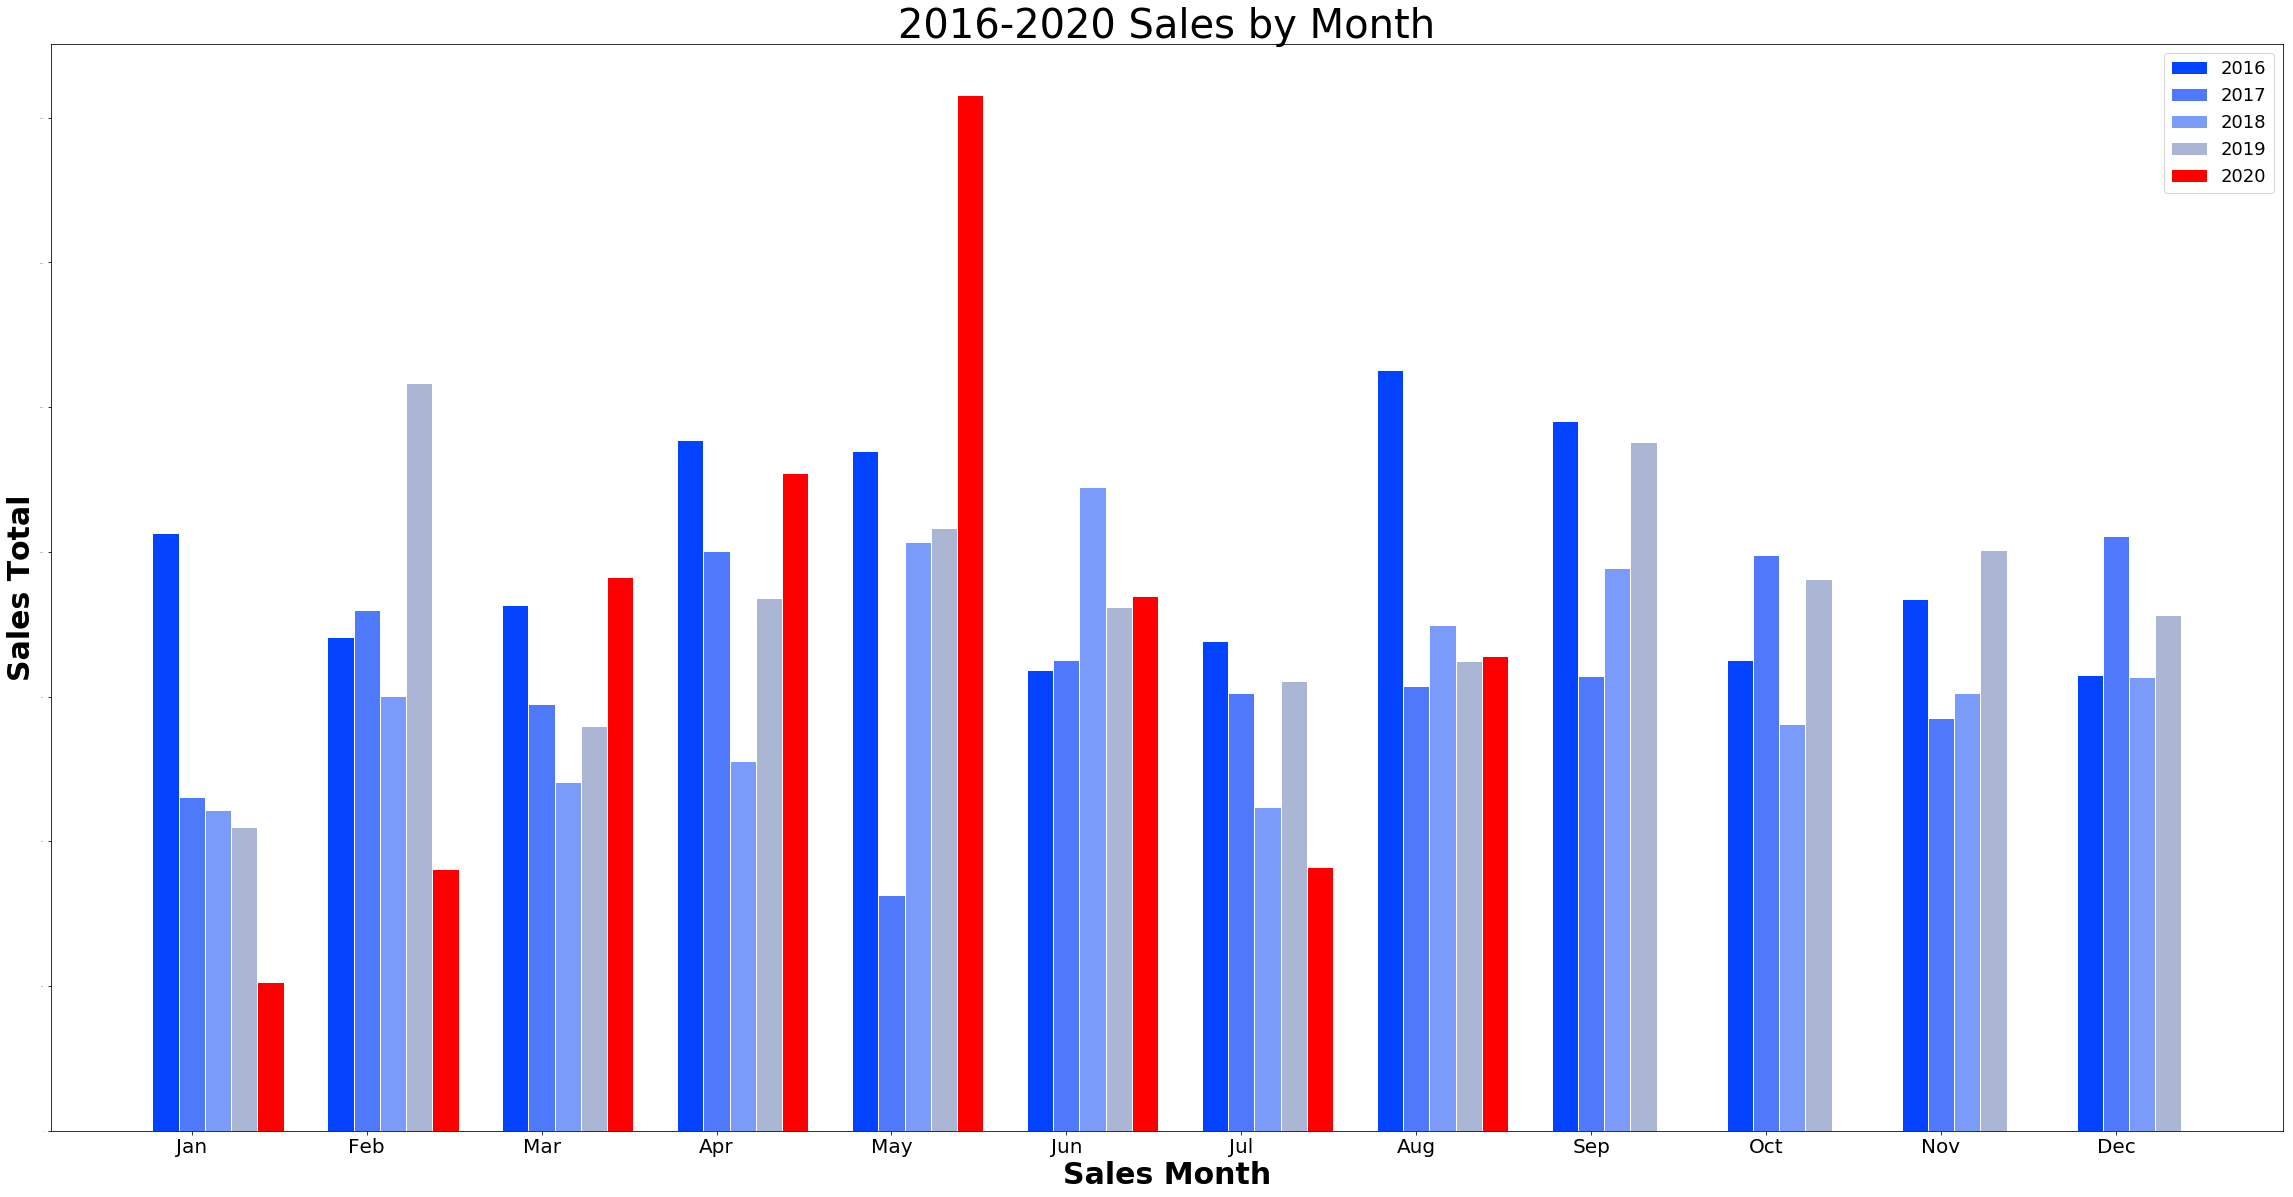

In [26]:
# Plot 2016-2019 sales volume by month

# set width of bar
barWidth = 0.15
figure(figsize=(40,20))
 
# set height of bar
bars1 = year2_sales_months.PayTotal
bars2 = year3_sales_months.PayTotal
bars3 = year4_sales_months.PayTotal
bars4 = year5_sales_months.PayTotal
bars5 = year6_sales_months.PayTotal
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4[0:8]]
 
# Make the plot
plt.bar(r1, bars1, color='#0342ff', width=barWidth, edgecolor='white', label='2016')
plt.bar(r2, bars2, color='#4d79fa', width=barWidth, edgecolor='white', label='2017')
plt.bar(r3, bars3, color='#7a9bfa', width=barWidth, edgecolor='white', label='2018')
plt.bar(r4, bars4, color='#abb6d4', width=barWidth, edgecolor='white', label='2019')
plt.bar(r5, bars5, color='red', width=barWidth, edgecolor='white', label='2020')
 
# Add xticks on the middle of the group bars
plt.xlabel('Sales Month', fontweight='bold', fontsize='30')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
                                                       'Sep', 'Oct', 'Nov', 'Dec'], fontsize=20)
plt.ylabel('Sales Total', fontweight='bold', fontsize='30')
plt.yticks(fontsize=0)
plt.title('2016-2020 Sales by Month', fontsize=40)
 
# Create legend & Show graphic
plt.legend(fontsize=18)
plt.show()

In [27]:
# Group each year's Pay Totals by quarter
year2_sales_quarters = year2_sales.groupby(['Quarter']).sum()
year3_sales_quarters = year3_sales.groupby(['Quarter']).sum()
year4_sales_quarters = year4_sales.groupby(['Quarter']).sum()
year5_sales_quarters = year5_sales.groupby(['Quarter']).sum()
year6_sales_quarters = year6_sales.groupby(['Quarter']).sum()
year5_sales_quarters.head(1)

,PayTotal,PayCount
Quarter,,
1,277424.20,815


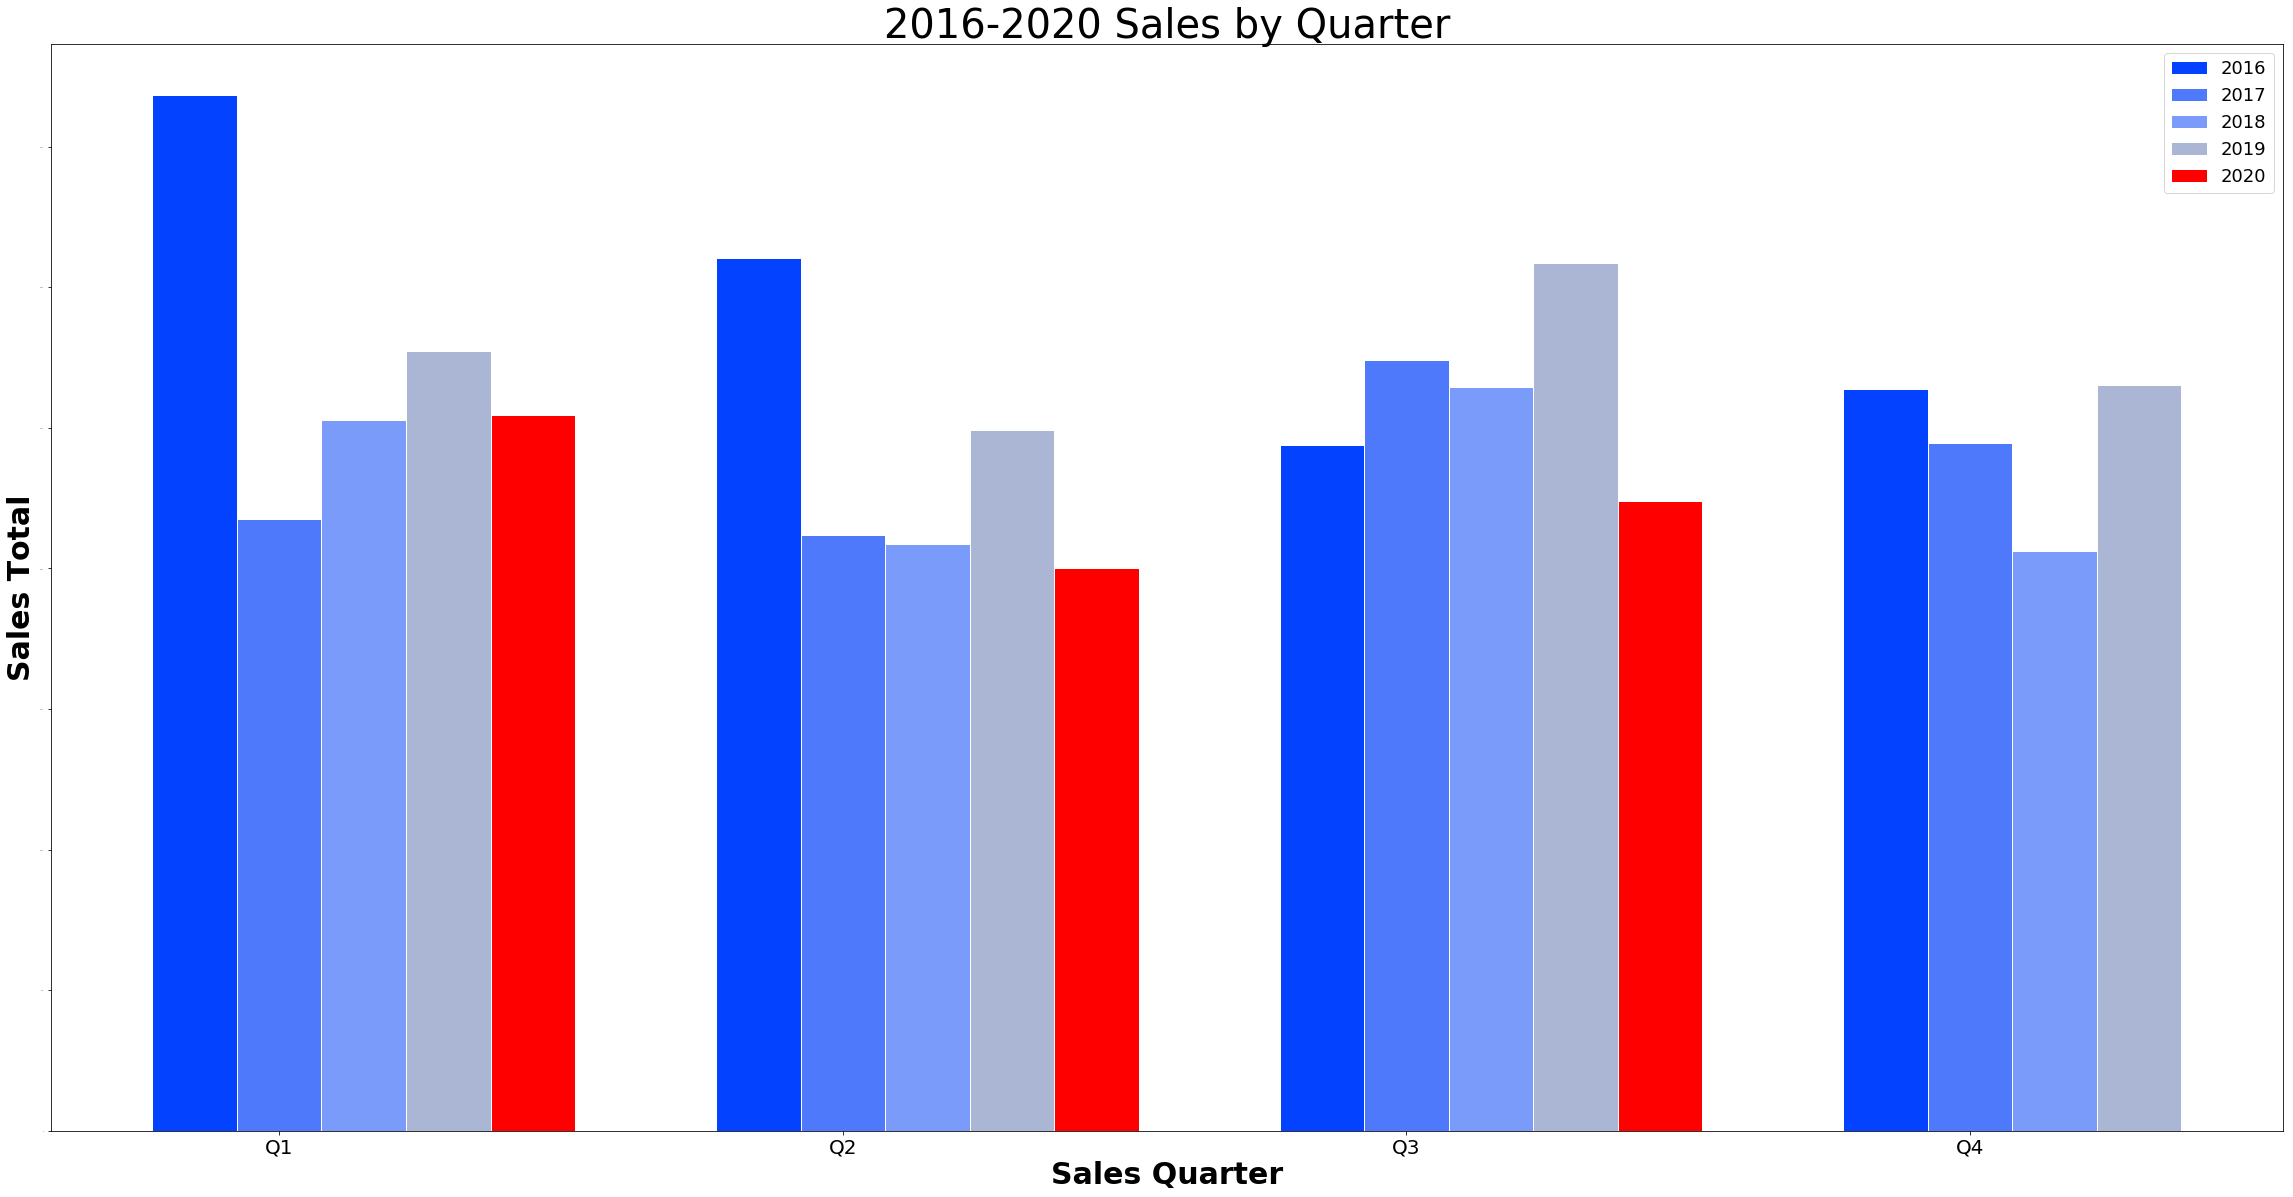

In [28]:
# Plot 2016-2020 sales volume by quarter

# set width of bar
barWidth = 0.15
figure(figsize=(40,20))
 
# set height of bar
bars1 = year2_sales_quarters.PayTotal
bars2 = year3_sales_quarters.PayTotal
bars3 = year4_sales_quarters.PayTotal
bars4 = year5_sales_quarters.PayTotal
bars5 = year6_sales_quarters.PayTotal
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4[0:3]]
 
# Make the plot
plt.bar(r1, bars1, color='#0342ff', width=barWidth, edgecolor='white', label='2016')
plt.bar(r2, bars2, color='#4d79fa', width=barWidth, edgecolor='white', label='2017')
plt.bar(r3, bars3, color='#7a9bfa', width=barWidth, edgecolor='white', label='2018')
plt.bar(r4, bars4, color='#abb6d4', width=barWidth, edgecolor='white', label='2019')
plt.bar(r5, bars5, color='red', width=barWidth, edgecolor='white', label='2020')
 
# Add xticks on the middle of the group bars
plt.xlabel('Sales Quarter', fontweight='bold', fontsize='30')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Q1', 'Q2', 'Q3', 'Q4'], fontsize=20)
plt.ylabel('Sales Total', fontweight='bold', fontsize='30')
plt.yticks(fontsize=0)
plt.title('2016-2020 Sales by Quarter', fontsize=40)
 
# Create legend & Show graphic
plt.legend(fontsize=18)
plt.show()

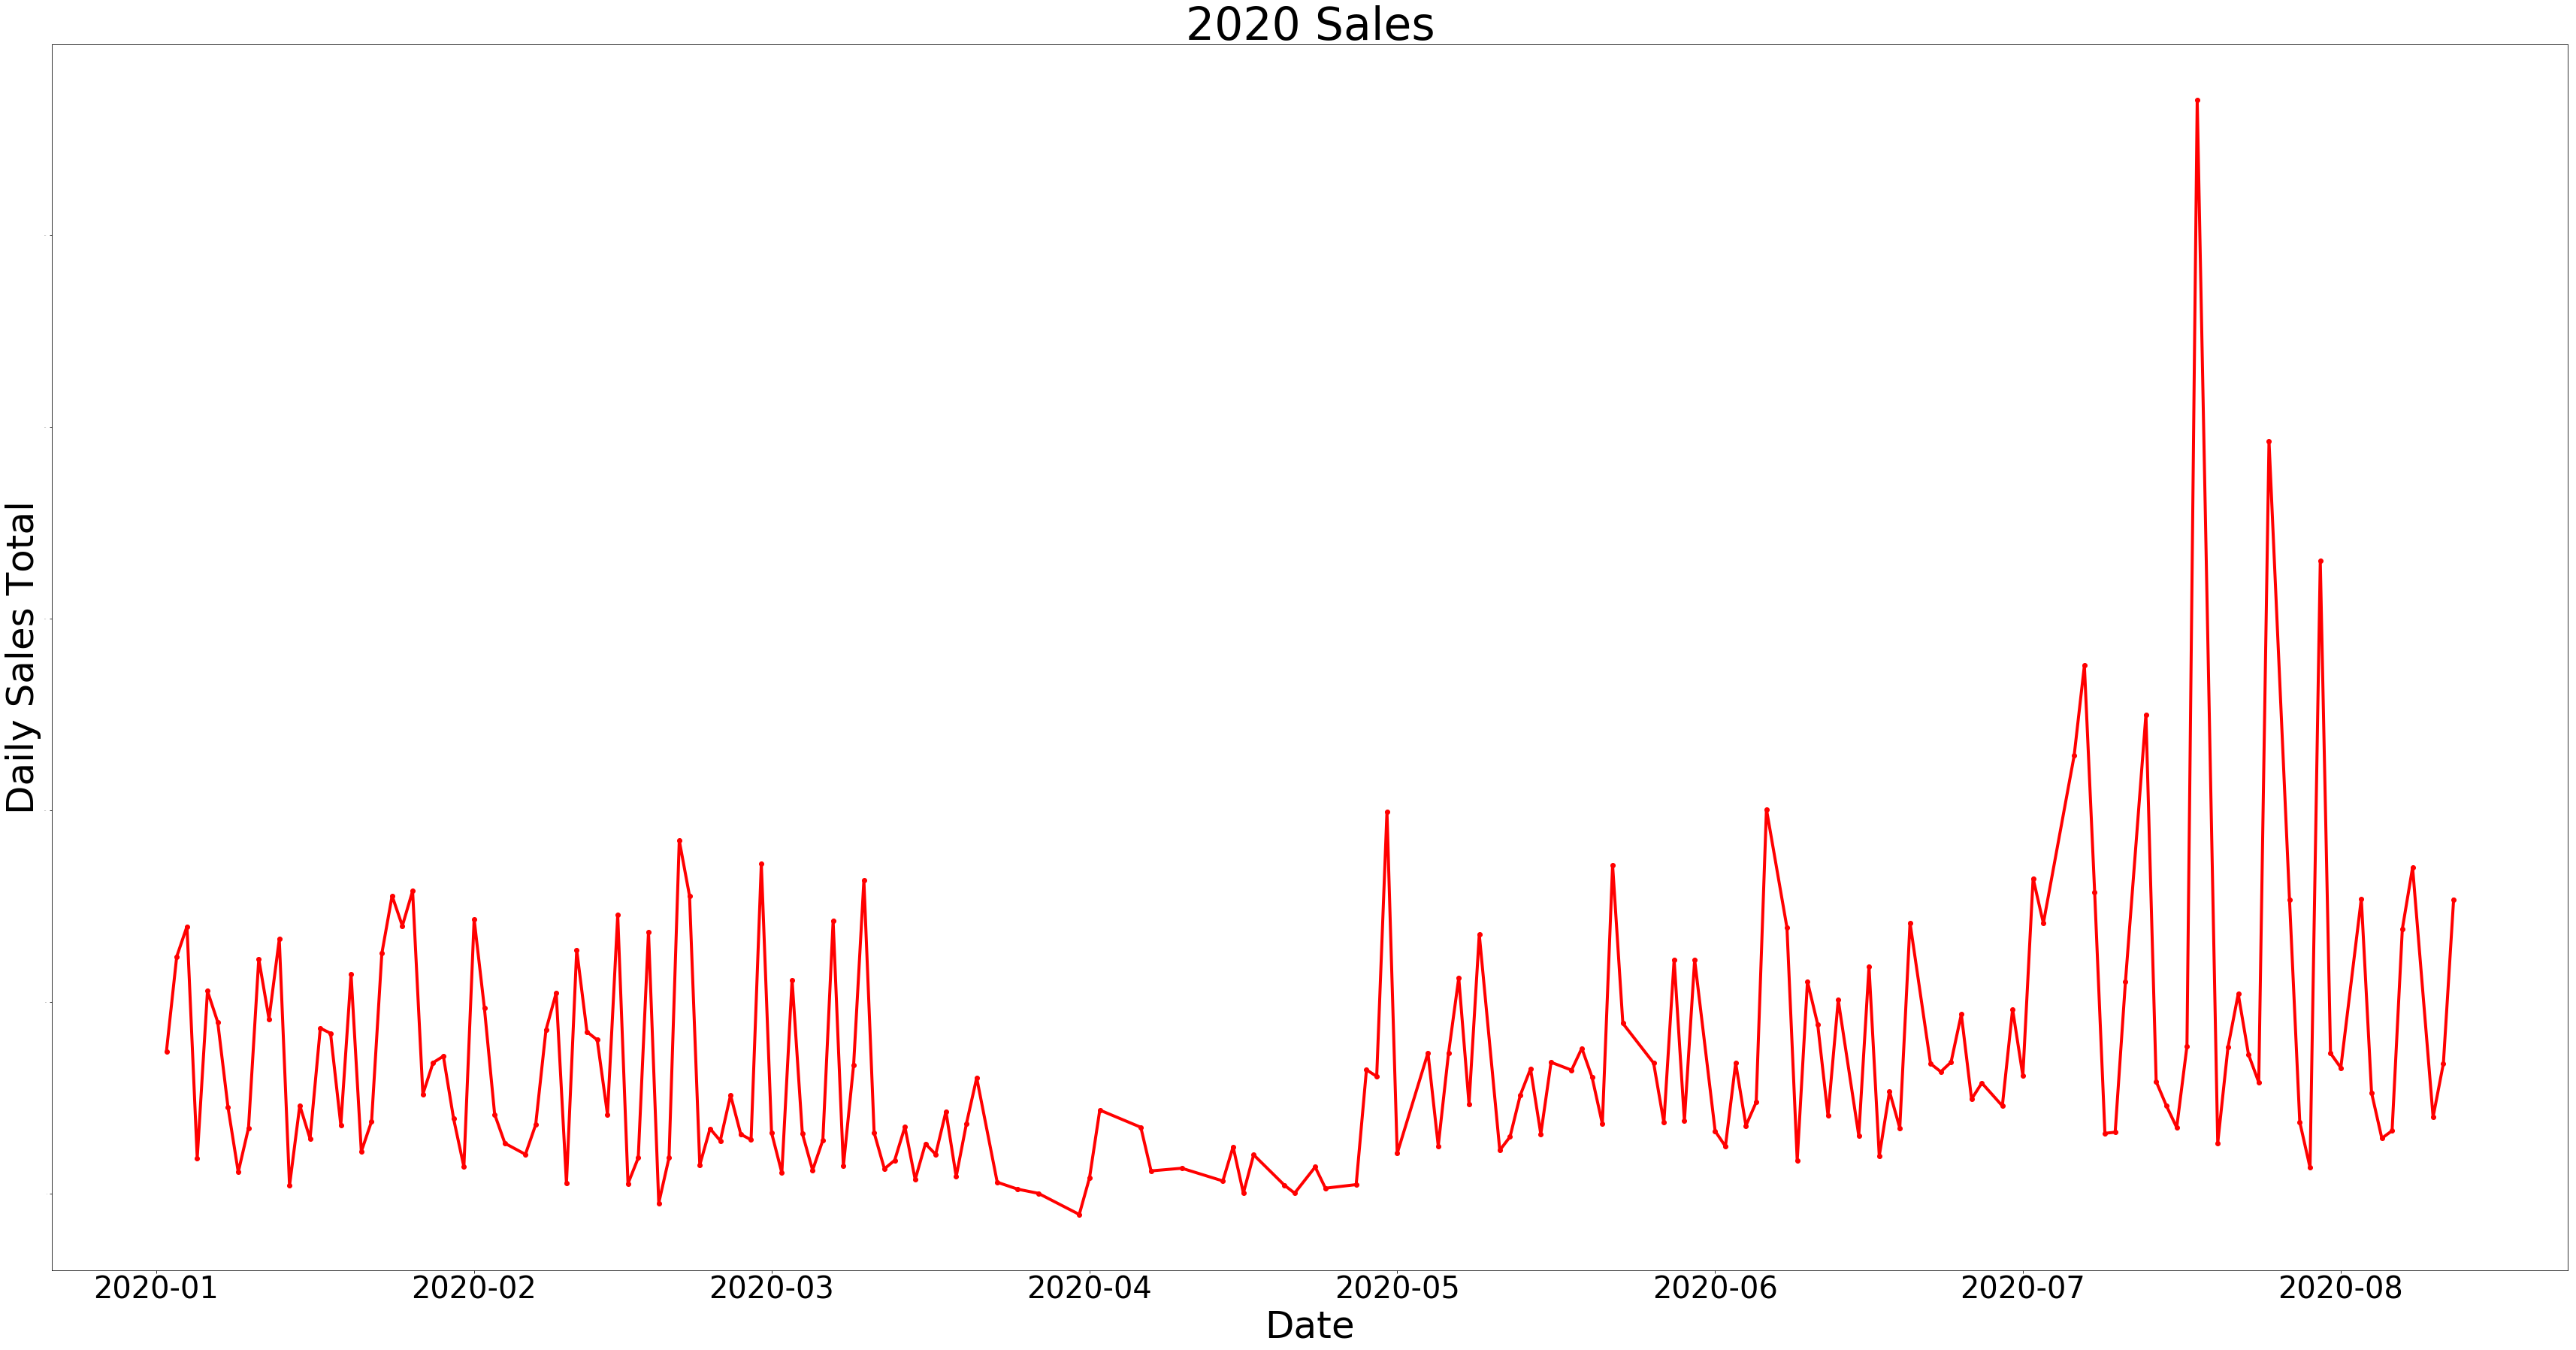

In [29]:
# Plot 2020 sales over the year to date
plt.figure(figsize=(60,30))
plt.plot(year6_sales.index, 'PayTotal', data=year6_sales, marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=4)
plt.title('2020 Sales', fontsize=60)
plt.xlabel('Date', fontsize=50)
plt.ylabel('Daily Sales Total', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=0)
plt.show()